In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import geopy.distance as gd

In [571]:
#pip install geopy

## Import and Load Data

In [391]:
permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv')
#permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv',parse_dates = ['Date Entered','Date Issued','Expiration Date'])
permits.head(3)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,Parcel,x,y
0,201511887,Short Term Rental - Non-Owner Occupied,4/1/2015 5:00:00 AM,7/9/2015 5:00:00 AM,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.834922,36.209292,1,37218,06904012500,-9.666419e+06,4.329458e+06
1,201512342,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,1004 MANSFIELD ST,NASHVILLE,TN,S SIDE MANSFIELD ST E OF MCFERRIN AVE IN OLWIL...,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.752833,36.181426,2,37206,08208040200,-9.657281e+06,4.325614e+06
2,201512346,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,1027 DELMAS AVE,NASHVILLE,TN,PT LOT 3 EASTHILL SUB,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.741508,36.199439,3,37216,07210009800,-9.656020e+06,4.328099e+06


In [544]:
listings = pd.read_csv('../data/listings.csv')
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17143,-86.73570,Private room,43.0,30,670,2020-03-03,3.58,1,260,0,NaN
1,39870,Close to Vanderbilt 2,171184,Evelyn,NaN,District 25,36.12466,-86.81269,Private room,70.0,1,504,2024-09-07,5.17,1,205,98,NaN
2,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.13122,-86.80066,Entire home/apt,100.0,2,743,2024-09-08,4.59,1,53,40,NaN
3,258817,"ButterflyRoom-queen room, private bath",22296,Diana,NaN,District 12,36.16076,-86.59151,Private room,34.0,30,97,2023-12-27,0.62,8,357,1,NaN
4,289242,"MorningstarHouse, monthly room-",22296,Diana,NaN,District 12,36.16296,-86.59113,Private room,34.0,30,76,2019-01-12,0.49,8,365,0,NaN


In [559]:
reviews  = pd.read_csv('../data/reviews.csv',parse_dates = ['date'])
reviews.head(5)

,listing_id,date
0,6422,2009-04-30
1,6422,2009-06-11
2,6422,2009-06-17
3,6422,2009-07-18
4,6422,2009-09-29


## Rental permits Data Analysis

In [393]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    15484 non-null  object 
 1   Permit Subtype Description  15484 non-null  object 
 2   Date Entered                15484 non-null  object 
 3   Date Issued                 14173 non-null  object 
 4   Address                     15484 non-null  object 
 5   City                        15483 non-null  object 
 6   State                       15483 non-null  object 
 7   Subdivision Lot             15483 non-null  object 
 8   Permit Type                 15484 non-null  object 
 9   Permit SubType              15484 non-null  object 
 10  Purpose                     15383 non-null  object 
 11  Council District            15484 non-null  int64  
 12  Census Tract                15484 non-null  int64  
 13  Expiration Date             154

In [395]:
permits.value_counts("Permit Subtype Description")

Permit Subtype Description
Short Term Rental – Multifamily           7929
Short Term Rental - Owner Occupied        5794
Short Term Rental - Non-Owner Occupied    1761
Name: count, dtype: int64

In [397]:
permits.describe()

,Council District,Census Tract,Applicant Home Phone #,Applicant Mobile Phone #,Applicant Work Phone #,Applicant Work Phone Ext,Contact Home Phone #,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,x,y
count,15484.000000,1.548400e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15484.000000,15484.000000,15484.000000,15484.000000,1.548400e+04,1.548400e+04
mean,14.850297,3.691031e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.773836,36.162228,8176.860953,37201.219065,-9.659619e+06,4.322968e+06
std,7.166049,1.970448e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047805,0.036920,4763.791658,300.029465,5.321621e+03,5.090731e+03
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.040658,35.985097,1.000000,0.000000,-9.689322e+06,4.298571e+06
25%,6.000000,3.701270e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.800232,36.143866,3952.750000,37203.000000,-9.662558e+06,4.320435e+06
50%,17.000000,3.701620e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.780346,36.159386,8345.500000,37207.000000,-9.660344e+06,4.322575e+06
75%,19.000000,3.701810e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.747714,36.182163,12345.250000,37211.000000,-9.656711e+06,4.325716e+06
max,35.000000,3.701960e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.543676,36.385262,16274.000000,37228.000000,-9.633998e+06,4.353763e+06


In [637]:
# sns.histplot(data = permits,x='Permit Subtype Description')
# plt.show()

In [474]:
#updating data type for date columns
permits['Date Entered'] = pd.to_datetime(permits['Date Entered'])
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])
permits['Expiration Date']= pd.to_datetime(permits['Expiration Date'])

In [477]:
permits.dtypes

Permit #                              object
Permit Subtype Description            object
Date Entered                  datetime64[ns]
Date Issued                   datetime64[ns]
Address                               object
City                                  object
State                                 object
Subdivision Lot                       object
Permit Type                           object
Permit SubType                        object
Purpose                               object
Council District                       int64
Census Tract                           int64
Expiration Date               datetime64[ns]
Permit Owner Name                     object
Permit Owner Address 1                object
Permit Owner Address 2                object
Permit Owner Address 3                object
Permit Owner City                     object
Permit Owner State                    object
Permit Owner Zip Code                 object
Permit Status                         object
Applicant 

In [481]:
permits[['date applied','issued time']]= permits['Date Entered'].astype(str).str.split(' ',expand=True)
permits[['date approved','approved time']] = permits['Date Issued'].astype(str).str.split(' ',expand=True)
permits['date expired'] = permits['Expiration Date'].dt.date
#permits['date expired'] = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
#9/6/2025 0:00
permits.head(1)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,x,y,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,-9666419.309,4.329458e+06,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0


In [483]:
# permits_split_exp = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
# permits_split_exp


In [485]:
permits['date expired']= pd.to_datetime(permits['date expired'])

In [487]:
permits.dtypes

Permit #                              object
Permit Subtype Description            object
Date Entered                  datetime64[ns]
Date Issued                   datetime64[ns]
Address                               object
City                                  object
State                                 object
Subdivision Lot                       object
Permit Type                           object
Permit SubType                        object
Purpose                               object
Council District                       int64
Census Tract                           int64
Expiration Date               datetime64[ns]
Permit Owner Name                     object
Permit Owner Address 1                object
Permit Owner Address 2                object
Permit Owner Address 3                object
Permit Owner City                     object
Permit Owner State                    object
Permit Owner Zip Code                 object
Permit Status                         object
Applicant 

In [490]:
permits['year applied'] = permits['Date Entered'].astype(str).str.extract(r'(\d{4})', expand=False)
permits['year issued'] = permits['Date Issued'].astype(str).str.extract(r'(\d{4})', expand = False)
permits['year expired']=permits['Expiration Date'].dt.year
#permits['year expired'] = permits['date expired'].astype(str).str.extract('r(\d{4})', expand = False)
#2023-08-08
permits.head(2)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,x,y,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,-9.666419e+06,4.329458e+06,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0
1,201512342,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-06 05:00:00,1004 MANSFIELD ST,NASHVILLE,TN,S SIDE MANSFIELD ST E OF MCFERRIN AVE IN OLWIL...,CASR,CAZ10A002,...,-9.657281e+06,4.325614e+06,2015-04-06,05:00:00,2015-04-06,05:00:00,2020-04-06,2015,2015,2020.0


In [492]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Permit #                    15484 non-null  object        
 1   Permit Subtype Description  15484 non-null  object        
 2   Date Entered                15484 non-null  datetime64[ns]
 3   Date Issued                 14173 non-null  datetime64[ns]
 4   Address                     15484 non-null  object        
 5   City                        15483 non-null  object        
 6   State                       15483 non-null  object        
 7   Subdivision Lot             15483 non-null  object        
 8   Permit Type                 15484 non-null  object        
 9   Permit SubType              15484 non-null  object        
 10  Purpose                     15383 non-null  object        
 11  Council District            15484 non-null  int64     

In [495]:
permits['date applied'].min()


'2015-04-01'

In [497]:
permits['date applied'].max()

'2025-01-17'

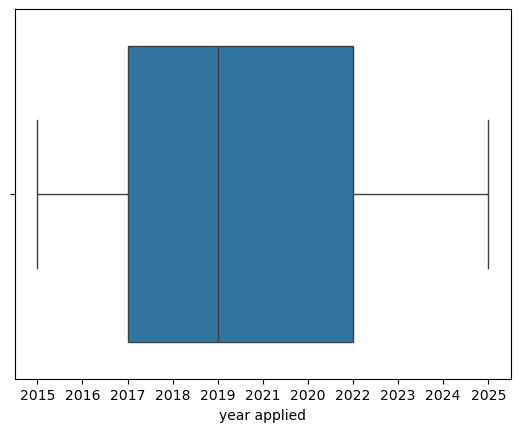

In [499]:
sns.boxplot(data=permits,x="year applied")
plt.show()

min = 2015,
max = 2025,  
q1 = 2017,  
q3 = 2022, 
median = 2019

In [505]:
#1.a.total applications applied for rental permit  in nashville
total_applications_received_by_year = permits.groupby('year applied')['Permit #'].count().sort_values(ascending=False).reset_index(name='count')
total_applications_received_by_year

,year applied,count
0,2019,2093
1,2018,2050
2,2022,1928
3,2017,1719
4,2016,1612
5,2021,1490
6,2015,1358
7,2024,1174
8,2023,1055
9,2020,948


In [507]:
#1.b.total applications applied for rental permit by city  per year
total_applications_received_by_year = permits.groupby(['City','year applied'])['Permit #'].count().sort_values(ascending=False).reset_index(name='count')
total_applications_received_by_year

,City,year applied,count
0,NASHVILLE,2019,2011
1,NASHVILLE,2018,1971
2,NASHVILLE,2022,1858
3,NASHVILLE,2017,1642
4,NASHVILLE,2016,1544
...,...,...,...
95,MOUNT JULIET,2023,1
96,MOUNT JULIET,2017,1
97,JOELTON,2017,1
98,JOELTON,2018,1


In [509]:
# 2.a. total type of applications overall nashville
Type_of_permits_overall = permits.groupby('Permit Subtype Description')['Permit #'].count().reset_index(name = 'total count')
Type_of_permits_overall

,Permit Subtype Description,total count
0,Short Term Rental - Non-Owner Occupied,1761
1,Short Term Rental - Owner Occupied,5794
2,Short Term Rental – Multifamily,7929


In [511]:
# 2.a. total type of applications overall nashville year wise
Type_of_permits_overall_year = permits.groupby(['year applied','Permit Subtype Description'])['Permit #'].count().reset_index(name = 'total count')
Type_of_permits_overall_year

,year applied,Permit Subtype Description,total count
0,2015,Short Term Rental - Non-Owner Occupied,669
1,2015,Short Term Rental - Owner Occupied,458
2,2015,Short Term Rental – Multifamily,231
3,2016,Short Term Rental - Non-Owner Occupied,621
4,2016,Short Term Rental - Owner Occupied,614
5,2016,Short Term Rental – Multifamily,377
6,2017,Short Term Rental - Non-Owner Occupied,253
7,2017,Short Term Rental - Owner Occupied,801
8,2017,Short Term Rental – Multifamily,665
9,2018,Short Term Rental - Non-Owner Occupied,127


In [513]:
# 2.b. total type of applications by city 
Type_of_permits_by_city = permits.groupby(['year applied','City','Permit Subtype Description'])['Permit #'].count().sort_values(ascending = False).reset_index(name = 'total count')
Type_of_permits_by_city

,year applied,City,Permit Subtype Description,total count
0,2022,NASHVILLE,Short Term Rental – Multifamily,1373
1,2019,NASHVILLE,Short Term Rental – Multifamily,1145
2,2021,NASHVILLE,Short Term Rental – Multifamily,1098
3,2018,NASHVILLE,Short Term Rental - Owner Occupied,955
4,2018,NASHVILLE,Short Term Rental – Multifamily,890
...,...,...,...,...
165,2022,GOODLETTSVILLE,Short Term Rental - Owner Occupied,1
166,2016,HERMITAGE,Short Term Rental – Multifamily,1
167,2022,MADISON,Short Term Rental - Non-Owner Occupied,1
168,2016,GOODLETTSVILLE,Short Term Rental - Owner Occupied,1


In [516]:
#3.total count of applications by city wise
total_applications_received_by_city = permits.groupby('City')['Permit #'].count().sort_values(ascending=False).reset_index()
total_applications_received_by_city

,City,Permit #
0,NASHVILLE,14864
1,MADISON,208
2,ANTIOCH,104
3,HERMITAGE,95
4,OLD HICKORY,86
5,WHITES CREEK,37
6,GOODLETTSVILLE,35
7,BRENTWOOD,25
8,JOELTON,14
9,PEGRAM,8


In [518]:
total_applications_received_by_city['Permit #'].mean()

1032.2

In [520]:
#status of application overall nashville
status_of_applications = permits.groupby('Permit Status')['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,Permit Status,Permit #
0,ISSUED,7014
1,EXPIRED,6575
2,CANCELLED,1721
3,REVOKED,77
4,EXPIREEXT,48
5,PENDING,36
6,HOLD,9
7,REFUNDED,3
8,VOID,1


In [522]:
status_of_applications = permits.groupby(['year applied','Permit Status','Permit Subtype Description'])['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,year applied,Permit Status,Permit Subtype Description,Permit #
0,2022,ISSUED,Short Term Rental – Multifamily,1108
1,2021,ISSUED,Short Term Rental – Multifamily,833
2,2024,ISSUED,Short Term Rental – Multifamily,762
3,2018,EXPIRED,Short Term Rental - Owner Occupied,630
4,2019,EXPIRED,Short Term Rental – Multifamily,574
...,...,...,...,...
122,2020,REFUNDED,Short Term Rental – Multifamily,1
123,2018,HOLD,Short Term Rental - Owner Occupied,1
124,2022,EXPIRED,Short Term Rental - Non-Owner Occupied,1
125,2019,REVOKED,Short Term Rental - Non-Owner Occupied,1


In [537]:
by_end_of_2025 = permits[(permits["year expired"] == 2025.0)  & (permits["Permit Status"] == 'EXPIRED')]
by_end_of_2025

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,x,y,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
3109,2016064179,Short Term Rental - Non-Owner Occupied,2016-11-17 06:00:00,2016-12-07 06:00:00,908 SANDBURG CT,NASHVILLE,TN,LOT 94 REELFOOT SEC 2,CASR,CAZ10A002,...,-9.643638e+06,4.319700e+06,2016-11-17,06:00:00,2016-12-07,06:00:00,2025-01-06,2016,2016,2025.0
3214,2016068330,Short Term Rental - Non-Owner Occupied,2016-12-07 06:00:00,2016-12-19 06:00:00,733 GREYMONT DR,NASHVILLE,TN,LOT 114 SEC 2 GLENCLIFF ESTATES,CASR,CAZ10A002,...,-9.652496e+06,4.317026e+06,2016-12-07,06:00:00,2016-12-19,06:00:00,2025-01-18,2016,2016,2025.0
5473,2017074514,Short Term Rental - Owner Occupied,2017-11-20 06:00:00,2017-12-04 06:00:00,1915 PINEHURST DR,NASHVILLE,TN,LOT 315 SEC 3 BURCHWOOD GARDENS,CASR,CAZ10A001,...,-9.653027e+06,4.328101e+06,2017-11-20,06:00:00,2017-12-04,06:00:00,2025-01-03,2017,2017,2025.0
5540,2017077549,Short Term Rental - Owner Occupied,2017-12-05 06:00:00,2017-12-18 06:00:00,1412 A LILLIAN ST,NASHVILLE,TN,UNIT A HOMES AT 1412 LILLIAN STREET,CASR,CAZ10A001,...,-9.656451e+06,4.324378e+06,2017-12-05,06:00:00,2017-12-18,06:00:00,2025-01-17,2017,2017,2025.0
6430,2018071420,Short Term Rental - Owner Occupied,2018-11-13 06:00:00,2018-12-12 06:00:00,836 GLEN AVE,NASHVILLE,TN,PT LOT 73 WAVERLY PLACE,CASR,CAZ10A001,...,-9.660439e+06,4.318399e+06,2018-11-13,06:00:00,2018-12-12,06:00:00,2025-01-11,2018,2018,2025.0
6717,2018072918,Short Term Rental - Owner Occupied,2018-11-19 06:00:00,2018-12-04 06:00:00,3307 ELKINS AVE,NASHVILLE,TN,LOT 120 HORTENSE PLACE,CASR,CAZ10A001,...,-9.665275e+06,4.321349e+06,2018-11-19,06:00:00,2018-12-04,06:00:00,2025-01-03,2018,2018,2025.0
7489,2020073660,Short Term Rental - Owner Occupied,2020-11-24 06:00:00,2020-12-18 06:00:00,435 KINSEY BLVD,MADISON,TN,EAST SIDE KINSEY BOULEVARD NORTH OF WARD ROAD,CASR,CAZ10A001,...,-9.650234e+06,4.335978e+06,2020-11-24,06:00:00,2020-12-18,06:00:00,2025-01-17,2020,2020,2025.0
7498,2020075036,Short Term Rental - Owner Occupied,2020-12-02 06:00:00,2020-12-18 06:00:00,920 B N 5TH ST,NASHVILLE,TN,LOT 19 SHARPE & CRUTCHER ADDN,CASR,CAZ10A001,...,-9.658463e+06,4.326489e+06,2020-12-02,06:00:00,2020-12-18,06:00:00,2025-01-17,2020,2020,2025.0
7526,2020078720,Short Term Rental – Multifamily,2020-12-17 06:00:00,2021-01-08 06:00:00,920 SOUTH ST 323,NASHVILLE,TN,UNIT 323 ILLUME CONDOMINIUM,CASR,CAZ10A003,...,-9.660475e+06,4.320928e+06,2020-12-17,06:00:00,2021-01-08,06:00:00,2025-01-08,2020,2021,2025.0
8083,2019078169,Short Term Rental – Multifamily,2019-12-23 06:00:00,2020-01-17 06:00:00,105 DUKE ST 1,NASHVILLE,TN,UNIT 1 105-107 DUKE STREET,CASR,CAZ10A003,...,-9.658805e+06,4.329220e+06,2019-12-23,06:00:00,2020-01-17,06:00:00,2025-01-17,2019,2020,2025.0


## Airbnb Data 

In [561]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9166 entries, 0 to 9165
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9166 non-null   int64  
 1   name                            9166 non-null   object 
 2   host_id                         9166 non-null   int64  
 3   host_name                       9166 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9166 non-null   object 
 6   latitude                        9166 non-null   float64
 7   longitude                       9166 non-null   float64
 8   room_type                       9166 non-null   object 
 9   price                           6805 non-null   float64
 10  minimum_nights                  9166 non-null   int64  
 11  number_of_reviews               9166 non-null   int64  
 12  last_review                     81

In [563]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715058 entries, 0 to 715057
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  715058 non-null  int64         
 1   date        715058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.9 MB


In [575]:
#Create Rental Listing Distance From Airport and Nashville City Center
downtown_nashville = (36.165890, -86.784440)  
airport_nashville = (36.131687, -86.668823)
listings["downtown_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), downtown_nashville).miles, axis=1)
listings["airport_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), airport_nashville).miles, axis=1)
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,downtown_distance,airport_distance
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,43.0,30,670,2020-03-03,3.58,1,260,0,NaN,2.751481,4.636106
1,39870,Close to Vanderbilt 2,171184,Evelyn,NaN,District 25,36.124660,-86.812690,Private room,70.0,1,504,2024-09-07,5.17,1,205,98,NaN,3.252224,8.061674
2,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.131220,-86.800660,Entire home/apt,100.0,2,743,2024-09-08,4.59,1,53,40,NaN,2.556736,7.373976
3,258817,"ButterflyRoom-queen room, private bath",22296,Diana,NaN,District 12,36.160760,-86.591510,Private room,34.0,30,97,2023-12-27,0.62,8,357,1,NaN,10.792390,4.765550
4,289242,"MorningstarHouse, monthly room-",22296,Diana,NaN,District 12,36.162960,-86.591130,Private room,34.0,30,76,2019-01-12,0.49,8,365,0,NaN,10.809575,4.850286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,1247326005471531974,Monticello Music City Retreat,652447267,Sergetnia,NaN,District 2,36.212737,-86.787733,Entire home/apt,126.0,1,0,NaN,NaN,1,358,0,NaN,3.235309,8.684330
9162,1247334731357901293,4Beds + Safe & Quiet! 10min Airport & 15toDown...,415535365,Jake,NaN,District 29,36.089833,-86.638556,Entire home/apt,125.0,1,0,NaN,NaN,19,359,0,NaN,9.699728,3.345902
9163,1247754643220192637,Luxury 2BR/2BA walk to broadway,254191071,Cameron,NaN,District 19,36.150608,-86.778159,Entire home/apt,272.0,1,0,NaN,NaN,2,357,0,NaN,1.110622,6.252268
9164,1247865679127328482,"The Lockeland-Modern & Airy Escape, Walk To It...",6675690,Isabeau And Shaun,NaN,District 6,36.177866,-86.745841,Entire home/apt,295.0,2,0,NaN,NaN,66,326,0,NaN,2.310394,5.355698


In [587]:
#renaming the column listing_id to id  in reviews data frame
reviews = reviews.rename(columns={"listing_id":"id"})
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715058 entries, 0 to 715057
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      715058 non-null  int64         
 1   date    715058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.9 MB


In [593]:
# merging listings and reviews data frames
nashville_airbnb = pd.merge(reviews, listings, on ='id')
nashville_airbnb.head(3)

,id,date,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,downtown_distance,airport_distance
0,6422,2009-04-30,Nashville Charm,12172,Michele,NaN,District 6,36.17143,-86.7357,Private room,...,30,670,2020-03-03,3.58,1,260,0,NaN,2.751481,4.636106
1,6422,2009-06-11,Nashville Charm,12172,Michele,NaN,District 6,36.17143,-86.7357,Private room,...,30,670,2020-03-03,3.58,1,260,0,NaN,2.751481,4.636106
2,6422,2009-06-17,Nashville Charm,12172,Michele,NaN,District 6,36.17143,-86.7357,Private room,...,30,670,2020-03-03,3.58,1,260,0,NaN,2.751481,4.636106


In [609]:
#split the date column into year and month
nashville_airbnb['year'] = nashville_airbnb['date'].str.split('-', expand = True)[0]
nashville_airbnb['month'] = nashville_airbnb['date'].str.split('-', expand = True)[1].astype(int)
# Create 'season' Column from 'month' column and Transform 'month' Column
season_map = {1: 'Winter', 2: 'Winter', 3 : 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
nashville_airbnb['season'] = nashville_airbnb['month'].map(season_map) 
month_map = {1: 'January', 2: 'February', 3 : 'March',4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
nashville_airbnb['month'] = nashville_airbnb['month'].map(month_map)
nashville_airbnb

,id,date,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,downtown_distance,airport_distance,year,month,season
0,6422,2009-04-30,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,...,3.58,1,260,0,NaN,2.751481,4.636106,2009,April,Spring
1,6422,2009-06-11,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,...,3.58,1,260,0,NaN,2.751481,4.636106,2009,June,Summer
2,6422,2009-06-17,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,...,3.58,1,260,0,NaN,2.751481,4.636106,2009,June,Summer
3,6422,2009-07-18,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,...,3.58,1,260,0,NaN,2.751481,4.636106,2009,July,Summer
4,6422,2009-09-29,Nashville Charm,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,...,3.58,1,260,0,NaN,2.751481,4.636106,2009,September,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715053,1237730633295583851,2024-09-13,Little Zen Studio Apt. Downtown - Walk to Broa...,39323330,David,NaN,District 19,36.154863,-86.770436,Entire home/apt,...,4.00,5,329,4,NaN,1.091382,5.902964,2024,September,Fall
715054,1237730633295583851,2024-09-16,Little Zen Studio Apt. Downtown - Walk to Broa...,39323330,David,NaN,District 19,36.154863,-86.770436,Entire home/apt,...,4.00,5,329,4,NaN,1.091382,5.902964,2024,September,Fall
715055,1237864766285853016,2024-09-04,3BR Nashville Gem | 3 Miles to Broadway | Free...,200807241,Prasanna,NaN,District 5,36.204353,-86.743742,Entire home/apt,...,3.00,1,362,3,NaN,3.493927,6.530317,2024,September,Fall
715056,1237864766285853016,2024-09-06,3BR Nashville Gem | 3 Miles to Broadway | Free...,200807241,Prasanna,NaN,District 5,36.204353,-86.743742,Entire home/apt,...,3.00,1,362,3,NaN,3.493927,6.530317,2024,September,Fall


In [611]:
# Number of Available Listings in the Nashville Airbnb Ecosystem
print(f"There are {listings.id.nunique()} unique Airbnb rental listings in Nashville, TN")

There are 9166 unique Airbnb rental listings in Nashville, TN


In [615]:
# Average and Median Rental Listing Price Per Night in the  Nashville Airbnb Ecosystem
avg = listings.price.mean()
med = listings.price.median()
low = listings.price.min()
high = listings.price.max()
print(f"In Nashville, TN, nightly Airbnb rental prices could be as low as ${round(low)} and as high as ${round(high)}. the average nightly price of an Airbnb rental listing is ${round(avg)},  its median is around ${round(med)}")

In Nashville, TN, nightly Airbnb rental prices could be as low as $20 and as high as $7999. the average nightly price of an Airbnb rental listing is $210,  its median is around $168


In [625]:
#price categories
below_100 = (len(listings[listings.price < 100]) / len(listings.price))*100
below_150 = (len(listings[listings.price < 150])/len(listings.price))*100
below_200 = (len(listings[listings.price < 200])/len(listings.price))*100
below_1000 = (len(listings[listings.price < 1000])/len(listings.price))*100
price_ranges = {'Under $100': round(below_100), 'Under $150': round(below_150), 'Under $200': round(below_200), 'Under $1000': round(below_1000)}
price_ranges

{'Under $100': 15, 'Under $150': 31, 'Under $200': 46, 'Under $1000': 74}

Text(0.5, 1.0, 'Price Range Breakdown of Airbnb Listings in Nashville, TN')

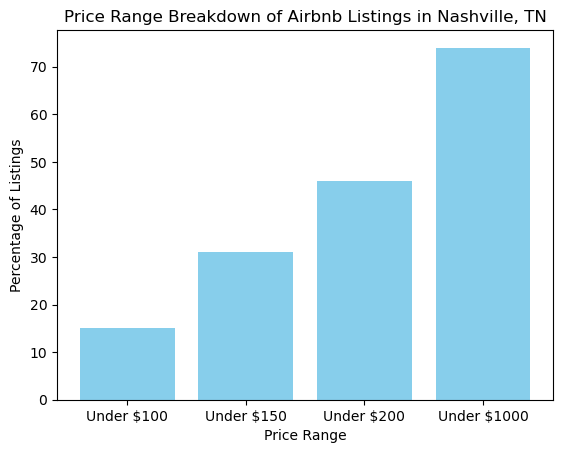

In [641]:
# Price Range Breakdown of Airbnb Listings in Nashville, TN
plt.bar((price_ranges.keys()), list(price_ranges.values()), align='center', color = 'skyblue')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Listings')
plt.title("Price Range Breakdown of Airbnb Listings in Nashville, TN")

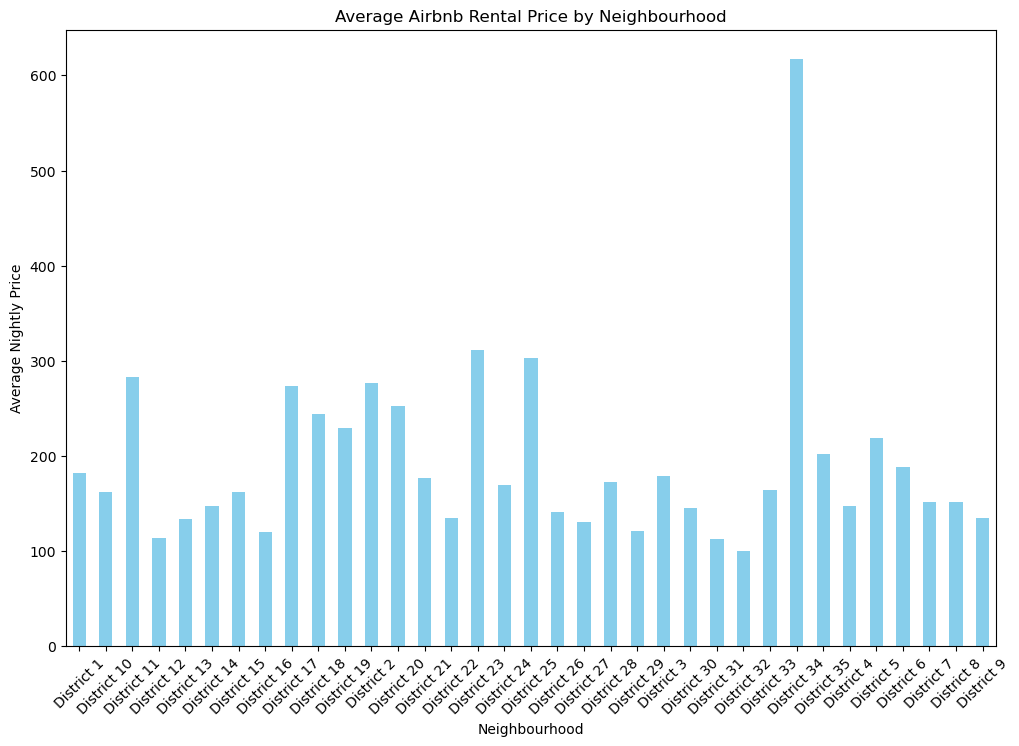

In [635]:
# Average Nashville Nightly Airbnb Listings Price by Neighbourhood
plt.figure(figsize=(12, 8))
neighbourhood_price = listings.groupby('neighbourhood')['price'].mean()
neighbourhood_price.plot(kind = 'bar', color = 'skyblue')
plt.title('Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()